In [96]:
# Importing necessary libraries
import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np  # NumPy for numerical operations

%matplotlib inline

# Data visualization libraries
import matplotlib.pyplot as plt  # Matplotlib for basic plotting
import seaborn as sns  # Seaborn for statistical data visualization

# Machine learning libraries
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # Linear Regression model
from sklearn.ensemble import RandomForestRegressor  # Random Forest Regressor model
from sklearn.metrics import mean_squared_error  # Metric for model evaluation

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [97]:
#Loading the dataset
myntra=pd.read_csv('Myntra Fasion Clothing 1 (1).csv')
myntra

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526559,https://www.myntra.com/sweaters/hm/hm-women-be...,16929990,H&M,Western,sweaters,Women,hm women beige oversized cashmere jumper,NaN,9999.0,NaN,"XS, S, M, L",NaN,NaN
526560,https://www.myntra.com/jackets/hm/hm-women-bla...,16026012,H&M,Western,jackets,Women,hm women black water repellent parka jacket,NaN,9999.0,NaN,"XS, S, M, L, XL",NaN,NaN
526561,https://www.myntra.com/dresses/250-designs/250...,17654114,250 DESIGNS,Western,dresses,Women,250 designs blue lace sheath dress,NaN,9999.0,NaN,"S, M, L, XL, XXL",NaN,NaN
526562,https://www.myntra.com/dresses/masaba/masaba-w...,12508700,Masaba,Western,dresses,Women,masaba women yellow printed a line dress,NaN,9999.0,NaN,"XS, S, M, L, XL",NaN,NaN


In [3]:
# Checking the first few rows of the training data set
myntra.head()

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


In [98]:
# checking the data type in the training dtata
myntra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526564 entries, 0 to 526563
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   URL                    526564 non-null  object 
 1   Product_id             526564 non-null  int64  
 2   BrandName              526564 non-null  object 
 3   Category               526564 non-null  object 
 4   Individual_category    526564 non-null  object 
 5   category_by_Gender     526564 non-null  object 
 6   Description            526564 non-null  object 
 7   DiscountPrice (in Rs)  333406 non-null  float64
 8   OriginalPrice (in Rs)  526564 non-null  float64
 9   DiscountOffer          452258 non-null  object 
 10  SizeOption             526564 non-null  object 
 11  Ratings                190412 non-null  float64
 12  Reviews                190412 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ MB


In [99]:
##to check the object datatypes
cols = myntra.select_dtypes(["object"])
cols.columns

Index(['URL', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountOffer', 'SizeOption'],
      dtype='object')

In [100]:
# Checking of missing values
myntra.isna().sum()
## total number of missing values in each coloumns

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64

In [101]:
# dropping URL, PRODUCT ID & DESCRIPTION as it is just for reference
myntra.drop(["URL","Product_id","Description"], axis=1, inplace=True)

In [102]:
myntra.describe(include=["object"]).T


,count,unique,top,freq
BrandName,526564,2088,Pothys,16005
Category,526564,8,Indian Wear,145845
Individual_category,526564,92,tshirts,61198
category_by_Gender,526564,2,Women,339185
DiscountOffer,452258,1418,50% OFF,52737
SizeOption,526564,3588,"S, M, L, XL, XXL",84643


In [103]:
myntra[myntra['DiscountPrice (in Rs)'].isnull()][:3]


,BrandName,Category,Individual_category,category_by_Gender,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
4,Roadster,Western,tshirts,Women,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0
5,Mast & Harbour,Western,tops,Women,NaN,599.0,40% OFF,"XS, S, M, L, XL",4.4,999.0
7,Mayra,Western,tops,Women,NaN,1395.0,58% OFF,"S, M, L, XL",3.7,998.0


In [104]:
# dividing the dataset into 2 parts where discount price is null and not null
data_DP_null = myntra[myntra['DiscountPrice (in Rs)'].isnull()]
data_DP_not_null = myntra[myntra['DiscountPrice (in Rs)'].notnull()]
print(myntra.shape)
print(data_DP_null.shape)
print(data_DP_not_null.shape)

(526564, 10)
(193158, 10)
(333406, 10)


In [105]:
# Let's impute the null discount offers by 0
data_DP_null['DiscountOffer'] = data_DP_null['DiscountOffer'].fillna(0)
data_DP_null['DiscountOffer'] = data_DP_null['DiscountOffer'].astype(str) # need to convert numerical 0 to string
print(data_DP_null['DiscountOffer'])

4         35% OFF
5         40% OFF
7         58% OFF
8               0
9               0
           ...   
526559          0
526560          0
526561          0
526562          0
526563          0
Name: DiscountOffer, Length: 193158, dtype: object


In [106]:
# splitting the discount offer coloumn values
data_DP_null['DiscountOffer'].apply(lambda x: x.split('%'))

4         [35,  OFF]
5         [40,  OFF]
7         [58,  OFF]
8                [0]
9                [0]
             ...    
526559           [0]
526560           [0]
526561           [0]
526562           [0]
526563           [0]
Name: DiscountOffer, Length: 193158, dtype: object

In [107]:
# Let's check the length of every value in the discount column
data_DP_null['DiscountOffer_len'] = data_DP_null['DiscountOffer'].apply(lambda x: len(x))
data_DP_null['DiscountOffer_len'].value_counts()

7     109474
1      74122
11      4018
12      2635
6       1855
9        896
10       158
Name: DiscountOffer_len, dtype: int64

In [108]:
print(data_DP_null[data_DP_null['DiscountOffer_len']==1]['DiscountOffer'])


8         0
9         0
11        0
17        0
20        0
         ..
526559    0
526560    0
526561    0
526562    0
526563    0
Name: DiscountOffer, Length: 74122, dtype: object


In [109]:
print(data_DP_null[data_DP_null['DiscountOffer_len']==6]['DiscountOffer'])


1174      5% OFF
1738      2% OFF
2153      5% OFF
2415      8% OFF
2503      8% OFF
           ...  
510274    1% OFF
510275    5% OFF
510646    5% OFF
510671    1% OFF
510810    1% OFF
Name: DiscountOffer, Length: 1855, dtype: object


In [110]:
print(data_DP_null[data_DP_null['DiscountOffer_len']==7]['DiscountOffer'])


4         35% OFF
5         40% OFF
7         58% OFF
13        50% OFF
14        60% OFF
           ...   
510807    48% OFF
510808    50% OFF
510809    50% OFF
510811    50% OFF
510812    40% OFF
Name: DiscountOffer, Length: 109474, dtype: object


In [111]:
print(data_DP_null[data_DP_null['DiscountOffer_len']==9]['DiscountOffer'])


77         45 % OFF
527        45 % OFF
850        60 % OFF
880        45 % OFF
973        60 % OFF
            ...    
509897     41 % OFF
509901     49 % OFF
510222     45 % OFF
510248     50 % OFF
510684     45 % OFF
Name: DiscountOffer, Length: 896, dtype: object


In [112]:
print(data_DP_null[data_DP_null['DiscountOffer_len']==10]['DiscountOffer'])


561       Rs. 38 OFF
1747      Rs. 10 OFF
3227      Rs. 15 OFF
3901      Rs. 80 OFF
6816      Rs. 33 OFF
             ...    
503178    Rs. 50 OFF
505875    Rs. 50 OFF
505968    Rs. 50 OFF
506746    Rs. 50 OFF
506748    Rs. 50 OFF
Name: DiscountOffer, Length: 158, dtype: object


In [113]:
print(data_DP_null[data_DP_null['DiscountOffer_len']==11]['DiscountOffer'])


182       Rs. 500 OFF
199       Rs. 400 OFF
243       Rs. 300 OFF
325       Rs. 300 OFF
356       Rs. 500 OFF
             ...     
510703    Rs. 500 OFF
510704    Rs. 500 OFF
510705    Rs. 430 OFF
510708    Rs. 200 OFF
510730    Rs. 200 OFF
Name: DiscountOffer, Length: 4018, dtype: object


In [114]:
print(data_DP_null[data_DP_null['DiscountOffer_len']==12]['DiscountOffer'])


2013      Rs. 1100 OFF
2535      Rs. 1100 OFF
3188      Rs. 1100 OFF
4499      Rs. 1000 OFF
4637      Rs. 1200 OFF
              ...     
503949    Rs. 4000 OFF
503950    Rs. 4900 OFF
504004    Rs. 5100 OFF
504178    Rs. 4200 OFF
504193    Rs. 3499 OFF
Name: DiscountOffer, Length: 2635, dtype: object


In [115]:
# Let's save each values in different data frames
data1 = data_DP_null[data_DP_null['DiscountOffer_len']==1]
data6 = data_DP_null[data_DP_null['DiscountOffer_len']==6]
data7 = data_DP_null[data_DP_null['DiscountOffer_len']==7]
data9 = data_DP_null[data_DP_null['DiscountOffer_len']==9]
data10 = data_DP_null[data_DP_null['DiscountOffer_len']==10]
data11 = data_DP_null[data_DP_null['DiscountOffer_len']==11]
data12 = data_DP_null[data_DP_null['DiscountOffer_len']==12]

In [116]:
# getting the numerical values from respective data frames using different split method filteration
data1['discount_seg'] = data1['DiscountOffer'].apply(lambda x: x.split('%')[0])
data6['discount_seg'] = data6['DiscountOffer'].apply(lambda x: x.split('%')[0])
data7['discount_seg'] = data7['DiscountOffer'].apply(lambda x: x.split('%')[0])
data9['discount_seg'] = data9['DiscountOffer'].apply(lambda x: x.split('%')[0])
data10['discount_seg'] = data10['DiscountOffer'].apply(lambda x: (x.split('Rs.')[1]).split('OFF')[0]) # IT IS IN RUPEES VALUE OFF FROM ORIGINAL
data11['discount_seg'] = data11['DiscountOffer'].apply(lambda x: (x.split('Rs.')[1]).split('OFF')[0]) # IT IS IN RUPEES VALUE OFF FROM ORIGINAL
data12['discount_seg'] = data12['DiscountOffer'].apply(lambda x: (x.split('Rs.')[1]).split('OFF')[0]) # IT IS IN RUPEES VALUE OFF FROM ORIGINAL

In [117]:
# now getting the discounted price in numerical format
data1['discount_seg'] = data1['discount_seg'].astype(float)
data6['discount_seg'] = data6['discount_seg'].astype(float)
data7['discount_seg'] = data7['discount_seg'].astype(float)
data9['discount_seg'] = pd.to_numeric(data9['discount_seg'],errors ='coerce')
data10['discount_seg'] = data10['discount_seg'].astype(float)
data11['discount_seg'] = data11['discount_seg'].astype(float)
data12['discount_seg'] = data12['discount_seg'].astype(float)

In [118]:
# Now getting the exact price of the product after discount
data1['discount_seg_price'] = data1['OriginalPrice (in Rs)']-data1['discount_seg']
data6['discount_seg_price'] = data6['OriginalPrice (in Rs)']-(data6['OriginalPrice (in Rs)']*data6['discount_seg']/100)
data7['discount_seg_price'] = data7['OriginalPrice (in Rs)']-(data7['OriginalPrice (in Rs)']*data7['discount_seg']/100)
data9['discount_seg_price'] = data9['OriginalPrice (in Rs)']-(data9['OriginalPrice (in Rs)']*data9['discount_seg']/100)
data10['discount_seg_price'] = data10['OriginalPrice (in Rs)']-data10['discount_seg']
data11['discount_seg_price'] = data11['OriginalPrice (in Rs)']-data11['discount_seg']
data12['discount_seg_price'] = data12['OriginalPrice (in Rs)']-data12['discount_seg']

In [119]:
print(data_DP_null.isnull().sum())


BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer                 0
SizeOption                    0
Ratings                  120311
Reviews                  120311
DiscountOffer_len             0
dtype: int64


In [120]:
# Now recreate the original data frame
print('before',data_DP_null.shape)
data_DP_null.head()

before (193158, 11)


,BrandName,Category,Individual_category,category_by_Gender,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews,DiscountOffer_len
4,Roadster,Western,tshirts,Women,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0,7
5,Mast & Harbour,Western,tops,Women,NaN,599.0,40% OFF,"XS, S, M, L, XL",4.4,999.0,7
7,Mayra,Western,tops,Women,NaN,1395.0,58% OFF,"S, M, L, XL",3.7,998.0,7
8,Roadster,Western,tshirts,Women,NaN,1098.0,0,"XS, S, M, L, XL",4.3,997.0,1
9,HERE&NOW,Bottom Wear,jeans,Men,NaN,2749.0,0,"28, 30, 32, 34, 36",3.5,996.0,1


In [121]:
## concatinating the different coloumns 
data_DP_null = pd.concat([data1,data6, data7, data9, data10, data11, data12], axis = 0)
print('after',data_DP_null.shape)
data_DP_null.head()

after (193158, 13)


,BrandName,Category,Individual_category,category_by_Gender,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews,DiscountOffer_len,discount_seg,discount_seg_price
8,Roadster,Western,tshirts,Women,NaN,1098.0,0,"XS, S, M, L, XL",4.3,997.0,1,0.0,1098.0
9,HERE&NOW,Bottom Wear,jeans,Men,NaN,2749.0,0,"28, 30, 32, 34, 36",3.5,996.0,1,0.0,2749.0
11,Roadster,Topwear,tshirts,Men,NaN,699.0,0,"XS, S, M, L, XL, XXL, 3XL, 4XL",4.1,996.0,1,0.0,699.0
17,Sangria,Plus Size,kurta-sets,Women,NaN,3999.0,0,"XS, S, M, L, XL, XXL, 3XL",4.3,995.0,1,0.0,3999.0
20,Roadster,Western,tshirts,Women,NaN,1298.0,0,"XS, S, M, L, XL",4.4,994.0,1,0.0,1298.0


In [122]:
# lets calculate the discount_seg_% now
data_DP_null['price_diff'] = data_DP_null['OriginalPrice (in Rs)']-data_DP_null['discount_seg_price']
data_DP_null['discount_seg_%'] = round(data_DP_null['price_diff']*100/data_DP_null['OriginalPrice (in Rs)'])

In [123]:
# Now we have found the proper output variable 
data_DP_null[['OriginalPrice (in Rs)',
              'DiscountPrice (in Rs)',
              'DiscountOffer',
              'discount_seg_price',
              'price_diff',
              'discount_seg_%'
             ]
            ]

,OriginalPrice (in Rs),DiscountPrice (in Rs),DiscountOffer,discount_seg_price,price_diff,discount_seg_%
8,1098.0,NaN,0,1098.0,0.0,0.0
9,2749.0,NaN,0,2749.0,0.0,0.0
11,699.0,NaN,0,699.0,0.0,0.0
17,3999.0,NaN,0,3999.0,0.0,0.0
20,1298.0,NaN,0,1298.0,0.0,0.0
...,...,...,...,...,...,...
503949,7199.0,NaN,Rs. 4000 OFF,3199.0,4000.0,56.0
503950,7199.0,NaN,Rs. 4900 OFF,2299.0,4900.0,68.0
504004,7399.0,NaN,Rs. 5100 OFF,2299.0,5100.0,69.0
504178,7599.0,NaN,Rs. 4200 OFF,3399.0,4200.0,55.0


In [124]:
# deleting unnecessary columns

del data_DP_null['price_diff']
del data_DP_null['DiscountOffer_len']
del data_DP_null['discount_seg']

In [125]:
# lets calculate the discount_seg_% now
data_DP_not_null['discount_seg_%'] = round(data_DP_not_null['DiscountPrice (in Rs)']*100/data_DP_not_null['OriginalPrice (in Rs)'])

In [126]:
data_DP_not_null.dtypes


BrandName                 object
Category                  object
Individual_category       object
category_by_Gender        object
DiscountPrice (in Rs)    float64
OriginalPrice (in Rs)    float64
DiscountOffer             object
SizeOption                object
Ratings                  float64
Reviews                  float64
discount_seg_%           float64
dtype: object

In [127]:
# lets calculate the discount_seg_% now
data_DP_not_null['price_diff'] = data_DP_not_null['OriginalPrice (in Rs)']-data_DP_not_null['DiscountPrice (in Rs)']
data_DP_not_null['discount_seg_%'] = round(data_DP_not_null['price_diff']*100/data_DP_not_null['OriginalPrice (in Rs)'])

In [128]:
data_DP_not_null[['OriginalPrice (in Rs)','DiscountPrice (in Rs)','price_diff','discount_seg_%']]


,OriginalPrice (in Rs),DiscountPrice (in Rs),price_diff,discount_seg_%
0,1499.0,824.0,675.0,45.0
1,1149.0,517.0,632.0,55.0
2,1399.0,629.0,770.0,55.0
3,1295.0,893.0,402.0,31.0
6,1499.0,599.0,900.0,60.0
...,...,...,...,...
443936,1010.0,464.0,546.0,54.0
443937,1010.0,464.0,546.0,54.0
443938,1010.0,464.0,546.0,54.0
443939,1010.0,464.0,546.0,54.0


In [129]:
data_DP_not_null.head()


,BrandName,Category,Individual_category,category_by_Gender,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews,discount_seg_%,price_diff
0,Roadster,Bottom Wear,jeans,Men,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0,45.0,675.0
1,LOCOMOTIVE,Bottom Wear,track-pants,Men,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0,55.0,632.0
2,Roadster,Topwear,shirts,Men,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0,55.0,770.0
3,Zivame,Lingerie & Sleep Wear,shapewear,Women,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0,31.0,402.0
6,HIGHLANDER,Bottom Wear,trousers,Men,599.0,1499.0,60% OFF,"30, 32, 34, 36",3.9,998.0,60.0,900.0


In [130]:
# creating the original data again with the new column
print(myntra.shape)
myntra.head()

(526564, 10)


,BrandName,Category,Individual_category,category_by_Gender,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,Roadster,Bottom Wear,jeans,Men,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,LOCOMOTIVE,Bottom Wear,track-pants,Men,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,Roadster,Topwear,shirts,Men,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,Zivame,Lingerie & Sleep Wear,shapewear,Women,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,Roadster,Western,tshirts,Women,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


In [131]:
#making the new dataframe with no missing values
data_new = pd.concat([data_DP_null,data_DP_not_null], axis=0)
print(data_new.shape)
data_new.head()

(526564, 13)


,BrandName,Category,Individual_category,category_by_Gender,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews,discount_seg_price,discount_seg_%,price_diff
8,Roadster,Western,tshirts,Women,NaN,1098.0,0,"XS, S, M, L, XL",4.3,997.0,1098.0,0.0,NaN
9,HERE&NOW,Bottom Wear,jeans,Men,NaN,2749.0,0,"28, 30, 32, 34, 36",3.5,996.0,2749.0,0.0,NaN
11,Roadster,Topwear,tshirts,Men,NaN,699.0,0,"XS, S, M, L, XL, XXL, 3XL, 4XL",4.1,996.0,699.0,0.0,NaN
17,Sangria,Plus Size,kurta-sets,Women,NaN,3999.0,0,"XS, S, M, L, XL, XXL, 3XL",4.3,995.0,3999.0,0.0,NaN
20,Roadster,Western,tshirts,Women,NaN,1298.0,0,"XS, S, M, L, XL",4.4,994.0,1298.0,0.0,NaN


In [132]:
##to check the object datatypes
cols = data_new.select_dtypes(["object"])
cols.columns

Index(['BrandName', 'Category', 'Individual_category', 'category_by_Gender',
       'DiscountOffer', 'SizeOption'],
      dtype='object')

In [133]:
# changing object datatype to category
for i in cols.columns:
    data_new[i] = data_new[i].astype("category")

In [134]:
#Creating a new variable called selling price taking into account the discount price and discount_seg 
#as the missing values in discount price is in discount_seg
data_new['DiscountPrice (in Rs)'] = data_new['DiscountPrice (in Rs)'].fillna(data_new["discount_seg_price"])

In [135]:
#dropping DiscountPrice (in Rs), discount offer and discount_seg_price as we have made variables for them 
data_new.drop(["DiscountOffer","discount_seg_price","price_diff"], axis=1, inplace=True)

In [136]:
#making bins for brand which has sold less than 1000 units
b=data_new['BrandName'].value_counts()
brandslessthan1000=b[b<1000]

In [137]:
def handlingBrandName(value):
    if value in brandslessthan1000:
        return "Others"
    else :
        return value
data_new["Brandsnew"] = data_new["BrandName"].apply(handlingBrandName)
data_new["Brandsnew"].value_counts()

Others       257766
Pothys        16005
Roadster      10935
KALINI         9589
HERE&NOW       6515
              ...  
MIMOSA         1029
Harpa          1028
VASTRAMAY      1026
FREESOUL       1018
Okane          1012
Name: Brandsnew, Length: 119, dtype: int64

In [138]:
# imputation of missing values from ratings and reviews coloumn by interative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10000,random_state=0,n_nearest_features=7)
cols=['Ratings','Reviews']
data_new[cols]=imputer.fit_transform(data_new[cols])

In [139]:
# dropping brandname as we have new we have created a new vairable brandsnew and 
# dropping individual category as it has its attributes in category coloumn
data_new.drop(["BrandName"], axis=1, inplace=True)

In [140]:
# copying the new dataframe to copy my data
df1 = data_new.copy()
df1

,Category,Individual_category,category_by_Gender,DiscountPrice (in Rs),OriginalPrice (in Rs),SizeOption,Ratings,Reviews,discount_seg_%,Brandsnew
8,Western,tshirts,Women,1098.0,1098.0,"XS, S, M, L, XL",4.300000,997.00000,0.0,Roadster
9,Bottom Wear,jeans,Men,2749.0,2749.0,"28, 30, 32, 34, 36",3.500000,996.00000,0.0,HERE&NOW
11,Topwear,tshirts,Men,699.0,699.0,"XS, S, M, L, XL, XXL, 3XL, 4XL",4.100000,996.00000,0.0,Roadster
17,Plus Size,kurta-sets,Women,3999.0,3999.0,"XS, S, M, L, XL, XXL, 3XL",4.300000,995.00000,0.0,Sangria
20,Western,tshirts,Women,1298.0,1298.0,"XS, S, M, L, XL",4.400000,994.00000,0.0,Roadster
...,...,...,...,...,...,...,...,...,...,...
443936,Western,tops,Women,464.0,1010.0,"S, M, L",4.094892,61.99082,54.0,Others
443937,Western,tops,Women,464.0,1010.0,"S, M, L",4.094892,61.99082,54.0,Others
443938,Western,tops,Women,464.0,1010.0,"S, M, L",4.094892,61.99082,54.0,Others
443939,Western,tops,Women,464.0,1010.0,"S, M, L",4.094892,61.99082,54.0,Others


In [141]:
# getting dummmies for categorical variables
df1_encoded = pd.get_dummies(df1)

In [142]:
# splitting the dataset
X = df1_encoded.drop('Ratings',axis=1)
y = df1_encoded['Ratings']

In [144]:
X

,DiscountPrice (in Rs),OriginalPrice (in Rs),Reviews,discount_seg_%,Category_Bottom Wear,Category_Indian Wear,Category_Inner Wear & Sleep Wear,Category_Lingerie & Sleep Wear,Category_Plus Size,Category_Sports Wear,...,Brandsnew_WROGN,Brandsnew_XYXX,Brandsnew_ZALORA BASICS,Brandsnew_ZALORA WORK,Brandsnew_ZOLA,Brandsnew_Zivame,Brandsnew_all about you,Brandsnew_ether,Brandsnew_max,Brandsnew_plusS
8,1098.0,1098.0,997.00000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2749.0,2749.0,996.00000,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,699.0,699.0,996.00000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,3999.0,3999.0,995.00000,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20,1298.0,1298.0,994.00000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443936,464.0,1010.0,61.99082,54.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
443937,464.0,1010.0,61.99082,54.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
443938,464.0,1010.0,61.99082,54.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
443939,464.0,1010.0,61.99082,54.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
y

8         4.300000
9         3.500000
11        4.100000
17        4.300000
20        4.400000
            ...   
443936    4.094892
443937    4.094892
443938    4.094892
443939    4.094892
443940    4.094892
Name: Ratings, Length: 526564, dtype: float64

In [146]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, train_size=0.67, random_state=42)

In [147]:
# Split the data into training and test sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train, y_train, test_size=0.5, train_size=0.5, random_state=42)

In [148]:
from sklearn.linear_model import SGDRegressor
# Initialising 
reg = SGDRegressor(loss='squared_error',
    penalty='l2',
    alpha=0.0001,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    verbose=0,
    epsilon=0.1,
    random_state=None)

# Training
reg.fit(X_train_2, y_train_2)

SGDRegressor()

### Predict on the test set


In [149]:
pred_sdg1 = reg.predict(X_test_2)


In [150]:
from sklearn.metrics import mean_squared_error # importing mse

mean_squared_error(y_test_2, pred_sdg1) #mse

2.6141738743729024e+28

In [152]:
mse_sdg1=mean_squared_error(y_test_2, pred_sdg1) #mse
mse_sdg1

2.6141738743729024e+28

In [153]:
import math 

math.sqrt(mean_squared_error(y_test_2, pred_sdg1))

161684070779186.6

In [154]:
rmse_sdg1=math.sqrt(mean_squared_error(y_test_2, pred_sdg1))
rmse_sdg1

161684070779186.6

In [157]:
from joblib import load,dump # importing load and dump


In [158]:
dump(reg,'SgdRegressor.pkl') # dumping my model


['SgdRegressor.pkl']

In [159]:
loaded_model = load('SgdRegressor.pkl')
loaded_model

SGDRegressor()

In [160]:
loaded_model_trained1 = loaded_model.partial_fit(X_train,y_train)


In [164]:
loaded_model_trained1


SGDRegressor()

In [165]:
loaded_model_trained1.predict(X_test_2)


array([2.60375328e+14, 6.61049174e+14, 1.85824590e+14, ...,
       4.36580382e+14, 4.04556735e+14, 1.66509523e+14])

In [166]:
loaded_model_pred = loaded_model_trained1.predict(X_test_2)


In [167]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test_2, loaded_model_pred)

3.453191779626094e+29

In [168]:
mse_sdg2=mean_squared_error(y_test_2, loaded_model_pred)
mse_sdg2

3.453191779626094e+29

In [169]:
import math 

math.sqrt(mean_squared_error(y_test_2, loaded_model_pred))

587638645736144.1

In [172]:
rmse_sdg2=math.sqrt(mean_squared_error(y_test_2, loaded_model_pred))
rmse_sdg2

587638645736144.1

In [174]:
import mlflow
from mlflow.models import infer_signature
from sklearn.metrics import mean_squared_error

# Assuming you have already trained your SGDRegressor model and stored it in 'reg'

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params({
        "loss": 'squared_error',
        "penalty": 'l2',
        "alpha": 0.0001,
        "l1_ratio": 0.15,
        "fit_intercept": True,
        "max_iter": 1000,
        "tol": 0.001,
        "shuffle": True,
        "epsilon": 0.1,
        "random_state": None
    })

    # Log the metrics
    mlflow.log_metrics({
        "MSE": mse_sdg2,
        "RMSE":rmse_sdg2,
        
    })

    # Set a tag for additional information
    mlflow.set_tag("Training Info", "SGDRegressor model2 for Myntra dataset")

    # Infer the model signature
    signature = infer_signature(X_train, reg.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=reg,
        artifact_path="sgd_model_demo",
        signature=signature,
        input_example=X_train.head().to_dict(orient="records"),  # Assuming X_train is a DataFrame
        registered_model_name="SGDRegressor_model_2",
    )

2023/12/26 16:39:07 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed. The model artifacts have been logged successfully under mlflow-artifacts:/717650396813744181/2534232b72dd4abbb674eb9fef2c3c65/artifacts. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.
Successfully registered model 'SGDRegressor_model_2'.
2023/12/26 16:39:07 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SGDRegressor_model_2, version 1
Created version '1' of model 'SGDRegressor_model_2'.


RestException: INVALID_PARAMETER_VALUE: The run 2534232b72dd4abbb674eb9fef2c3c65 must be in 'active' lifecycle_stage.

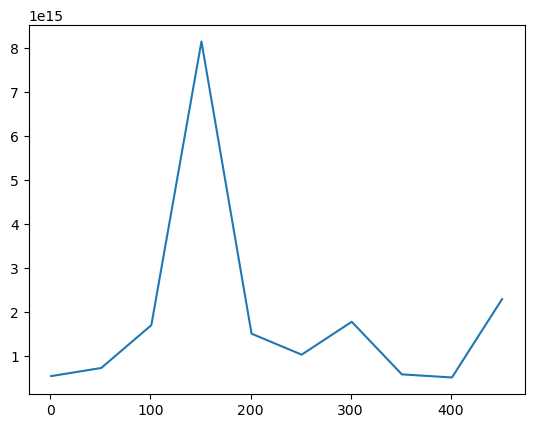

In [74]:
# Training on top, multiple epoch
acc_list = []

for i in range(1,500,50):
    loaded_model_trained1 = loaded_model.partial_fit(X_train,y_train)
    loaded_model_pred = loaded_model_trained1.predict(X_test_2)
    
    acc_list.append(math.sqrt(mean_squared_error(y_test_2, loaded_model_pred)))
    
x_range_temp = []
for i in range(1,500,50):
    x_range_temp.append(i)

plt.plot(x_range_temp,acc_list)

## PassiveAggressiveRegressor


In [76]:
from sklearn.linear_model import PassiveAggressiveRegressor


In [77]:
reg = PassiveAggressiveRegressor()
reg.fit(X_train_2, y_train_2)

PassiveAggressiveRegressor()

In [ ]:
## Predict on the test set


In [78]:
pred = reg.predict(X_test_2)


In [79]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test_2, pred) #mse

0.28054210263387264

In [80]:
import math 

math.sqrt(mean_squared_error(y_test_2, pred))

0.5296622533595089

In [81]:
from joblib import load,dump
dump(reg,'PARegressor.pkl') # dumping the model

['PARegressor.pkl']

In [82]:
loaded_model = load('PARegressor.pkl') # loading the model


In [83]:
loaded_model

PassiveAggressiveRegressor()

In [84]:
loaded_model_trained = loaded_model.partial_fit(X_train,y_train)


In [85]:
loaded_model_trained


PassiveAggressiveRegressor()

In [86]:
loaded_model_trained.predict(X_test_2)


array([3.83222509, 3.79806865, 4.11958386, ..., 4.04663593, 4.03504266,
       4.0806588 ])

In [87]:
loaded_model_pred = loaded_model_trained.predict(X_test_2)


In [88]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test_2, loaded_model_pred) #mse

0.29447919490006697

In [89]:
import math 

math.sqrt(mean_squared_error(y_test_2, loaded_model_pred))

0.5426593728114045

In [9]:
import mlflow

In [10]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")


In [11]:
mlflow.set_experiment("Myntra Dataset Modelling")

2023/12/26 13:58:53 INFO mlflow.tracking.fluent: Experiment with name 'Myntra Dataset Modelling' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/717650396813744181', creation_time=1703579333168, experiment_id='717650396813744181', last_update_time=1703579333168, lifecycle_stage='active', name='Myntra Dataset Modelling', tags={}>

In [170]:
import mlflow
from mlflow.models import infer_signature
from sklearn.metrics import mean_squared_error

# Assuming you have already trained your SGDRegressor model and stored it in 'reg'

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params({
        "loss": 'squared_error',
        "penalty": 'l2',
        "alpha": 0.0001,
        "l1_ratio": 0.15,
        "fit_intercept": True,
        "max_iter": 1000,
        "tol": 0.001,
        "shuffle": True,
        "epsilon": 0.1,
        "random_state": None
    })

    # Log the metrics
    mlflow.log_metrics({
        "MSE": mse_sdg1,
        "RMSE":rmse_sdg1,
        
    })

    # Set a tag for additional information
    mlflow.set_tag("Training Info", "SGDRegressor model for Myntra dataset")

    # Infer the model signature
    signature = infer_signature(X_train, reg.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=reg,
        artifact_path="sgd_model_demo",
        signature=signature,
        input_example=X_train.head().to_dict(orient="records"),  # Assuming X_train is a DataFrame
        registered_model_name="SGDRegressor_model_1",
    )

Registered model 'SGDRegressor_model_1' already exists. Creating a new version of this model...
2023/12/26 16:33:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SGDRegressor_model_1, version 4
Created version '4' of model 'SGDRegressor_model_1'.
